# How to Not Go Broke Betting on Sports
by Casey Durfee      
Copyright 2025

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random.default_rng(2718)

The best way to not go broke on betting is to reduce your bet size to zero. Scared money don't lose none.

It is impossible to escape randomness in sports betting. Any time you decide to bet, you enter its kingdom and have to abide by its laws. This is a pretty hard thing for us to know how to deal with, when our brains our pattern-finding machines. Even for fairly rational people, there are seeming paradoxes that emerge where you're dealing with enough random data.

## March Madness

The NCAA holds the March Madness tournament every year to determine who the best college basketball team is. It's a single elimination tournament of 64 teams, arranged into a big bracket.

Say we do a March Madness style bracket with coin flippers instead of basketball teams. We randomly assign them places in the bracket. For each matchup, the coin flipper at the top of the matchup flips a coin. If they get heads, they survive and advance. If they get tails, they lose.

Somebody's going to go 7-0 and win that tournament, right?

Imagine we expanded that to every single person on the planet. Every single person gets matched up into a 64 person march madness brackets, then each of those winners get added to another 64 team bracket, and so on. 

Eventually, someone is going to emerge the victor with a 33-0 record -- the greatest coin flipper in the world.

Right?

## Maximizing Profits: Kelly Criterion

Let's assume a bettor really does have an edge over the house -- they can beat the spreads on NBA basketball 56% of the time.

Even with that advantage, it's easy to go broke if you bet too much at once. Suppose they bet 25% of their bankroll on each bet.  What happens after 200 bets?  200 bets is not a lot, roughly 1 month of NBA games.

In [2]:
RUNS = 100000
BETS = 200
WIN_PCT = .56
BET_SIZE = .25
VIG = 1.1

def simulate_bankroll():
    print(f"simulating {BETS} bets at win percent {WIN_PCT}, vig {VIG}, bet size {BET_SIZE:.3f}\n")
    results = []
    for run in range(RUNS):
        bankroll = 100
        for bet_count in range(BETS):
            result = rng.random()
            if result < WIN_PCT:
                ## we won!
                bankroll = bankroll + (BET_SIZE * bankroll)
            else:
                ## we lost =(
                bankroll = bankroll - (VIG * BET_SIZE * bankroll)
        results.append(bankroll)
    return pd.Series(results)

def simulation_report(results):
    times_broke = sum(results < 5)
    print(f"Simulating {RUNS} times")
    print(f"We went broke {100 *times_broke / RUNS}% of the time")
    print(f"Best result {max(results):,}, Worst {min(results)}, \nmean {results.mean():,}, median {results.median():,} ")

In [3]:
results = simulate_bankroll()
simulation_report(results)

simulating 200 bets at win percent 0.56, vig 1.1, bet size 0.250

Simulating 100000 times
We went broke 52.624% of the time
Best result 45,795,860.97212911, Worst 1.6979849461764437e-07, 
mean 4,650.88830357692, median 3.6615589888655578 


### You know I'm only in it for the gold

I've defined "going broke" as being down to less than 5% of the original bankroll, which I will also call ruin. Mathematicians can be emo with their vocabulary -- surprise, loss, regret and ruin are all technical terms.

Once in a blue moon we end up a big winner, but most of the time we're left with less than 5% of our bankroll after 200 bets even though we have advantage. So it's still a game of chance rather than skill, even though it would require a lot of mental labor to make the picks, and time to actually bet the picks. The mean rate of return is quite impressive, but the median result is bankruptcy.

Intuitively, there has to be some connection between the betting advantage and the optimal amount to risk on each bet. If you only have a tiny advantage, you should only be making tiny bets. The better you are, the more you can risk. And if you have no advantage, you shouldn't bet actual money.

That intuition is correct. https://en.wikipedia.org/wiki/Kelly_criterion

Let's see what happens when we bet the amount recommended by the Kelly criterion.

In [4]:
p = WIN_PCT
q = 1 - WIN_PCT
b = 1 / VIG 

BET_SIZE = p - (q/b)

results = simulate_bankroll()
simulation_report(results)


simulating 200 bets at win percent 0.56, vig 1.1, bet size 0.076

Simulating 100000 times
We went broke 0.113% of the time
Best result 20,810.24527352384, Worst 1.879750165631289, 
mean 318.29236584004065, median 168.44629945083318 


That's a lot better. But notice how we can still go broke around 1 time in 1000! This is in just a month of betting what is supposed to be the optimal way.

Maybe if we do more bets with Kelly betting, we'll reduce the risk. That would be a reasonable assumption, right? It should make things less volatile and allow the player's advantage over the house with every bet to shine through.

In [5]:
BETS = 1000

results = simulate_bankroll()
simulation_report(results)

simulating 1000 bets at win percent 0.56, vig 1.1, bet size 0.076

Simulating 100000 times
We went broke 1.39% of the time
Best result 87,797,780.80832939, Worst 0.002598230795753785, 
mean 33,119.88771344828, median 1,356.1488894193767 


In [6]:
1.385 /.13

10.653846153846153

<span class="tex2jax_ignore">The median outcome is turning $100 into $1356, which is a sweet rate of return.</span>  But the chances of going broke actually increased! The player will go broke about 11x more often on 1000 bets than 200, which seems unfair, but we're in the kingdom of randomness.

The Kelly criterion doesn't make any guarantees about not going broke. It just offers the best way to optimize the expected value.

In the real world, I think a rational bettor would have a strategy to regularly take profits, while still getting most of the exponential growth offered by the Kelly criterion. It feels like it should be possible to guarantee profits almost all of the time (given a certain level of skill), by taking money out at regular intervals. Take 1/4 out each time the bankroll doubles or something like that. It would be fun to model, but I won't do that now. (Someone far smarter than me has probably already worked out the ideal solution, for some definition of "ideal". In which case I'm guessing it's like, take $1/2\pi$ out, every time the bankroll increases by a factor of $e$.)

### Partial Kelly Betting

Remember, to make this work, the player has to have an advantage over the house, know the exact size of the advantage, and consistently bet the right amounts. 

Kelly Betting is the optimal way to maximize profits, but what about lower risk? Here's what happens when we Kelly bet 2% of our bankroll.

In [7]:
BET_SIZE = .02
BETS = 1000

results = simulate_bankroll()
simulation_report(results)

simulating 1000 bets at win percent 0.56, vig 1.1, bet size 0.020

Simulating 100000 times
We went broke 0.0% of the time
Best result 5,894.394697860402, Worst 21.05827238773966, 
mean 457.9316935414564, median 367.4449586401224 


We didn't go broke in 100,000 simulations. Not bad. Mean rate of return on 1000 bets is 4.6x, and the median is 3.7x. So most of the time, it is a nice return on investment.

We still lost money 2.6% of the time, though. Being conservative, betting a lot of games at positive expected value, and betting the right way greatly increase the chances of success, but nothing can eliminate the possibility of failure.


In [8]:
sum((results > 5) & (results < 100)) / RUNS

0.02759

>Failure is always an option.

If you've still got room on your back, maybe get that one tattooed, too.

Imagine doing 1000 bets at 56% win percentage and a conservative bet size, and still losing money. Wild, isn't it? 

### Betting a constant amount
You wouldn't have that problem with betting a constant amount, right? Say you have a bankroll of $1000 and you bet to win $20 on each game. 1000 games, 56 win %.

This expected value of playing this way doesn't have any randomness in it. It's just a simple algebra problem. According to EV, we should end up with $2520 at the end of the season, for a profit of $1520.

If we actually simulate it, a pretty wide range of outcomes are possible.

In [9]:
def constant_ev():
    games = 1000
    bankroll = 1000
    win_rate = .56
    wins = win_rate * games
    losses = (1 - win_rate) * games
    bet_size = 20
    vig = 1.1

    constant_amt = bankroll + (wins * bet_size) - (losses * bet_size * vig)

    print(f"expected: {constant_amt}")
    return constant_amt


def actual_simulation(sims=100000, games=1000, init_bankroll=1000, skill=.56, bet_size=20, vig=1.1):
    outcomes = []
    for sim in range(sims):
        bankroll=init_bankroll
        ## this code is inefficient, but I want to make it clear there's no 'funny business'
        for game in range(games):
            if rng.random() < skill:
                # we won! =)
                bankroll += bet_size
            else:
                bankroll -= (bet_size * vig)
        outcomes.append(bankroll)
    return outcomes
        
ev = constant_ev()

outcomes = pd.Series(actual_simulation())
print(f"min: {outcomes.min()}, max: {outcomes.max()}")

expected: 2520.000000000002
min: -630.0, max: 5628.0


We can't take the randomness out of the real world. In 100,000 simulations of this scenario, 6 times the gambler will end up losing all their money and more.

In [10]:
sum(outcomes < 0)

6

$6/100,000$ is roughly $1/2^{14}$, so kinda like hitting a 14 leg parlay with no vig applied.

In [11]:
(6/100000) / (1/2**14)

0.98304

It only hits the exact expected value about 2.5% of the time. It's within 5% of the EV about 18% of the time.

In [12]:
100 * sum(round(outcomes) == round(ev)) / len(outcomes)

2.502

In [13]:
100 * sum((round(.95*ev) <= round(outcomes)) & ( round(outcomes) <= round(1.05*ev))) / len(outcomes)

17.676

<Axes: >

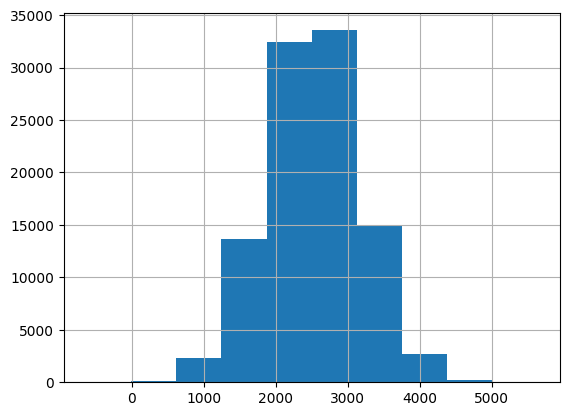

In [14]:
outcomes.hist()

With betting a fixed size, the rate of return is lower and the risk of going broke doesn't go away. So it's sub-optimal.

### Random Walks
Imagine going on a walk. Every time you get to an intersection, you flip a coin. If it's heads, you go one block north and one block east. If it's tails, you go one block south and one block east. This is called a random walk. If going north is making profits, and south is losing profits, it's a bit like a bettor's profits or losses plotted on a graph.

The vig kinda breaks the analogy, because you can't go 1.1 blocks south when you lose. But you could do it in a big field.

I think there's a huge value in knowing what random walks look like. Do they remind you of anything?

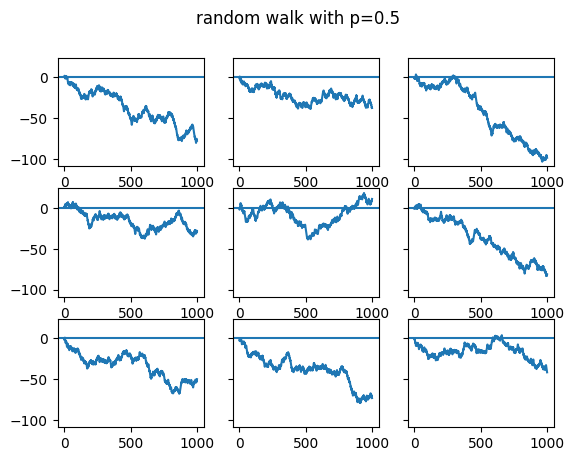

In [15]:
RANDOM_WALK_VIG = -1.1
def plot_random_walk(p, n=1000):
    fig, axs = plt.subplots(3,3, sharey='all')
    plt.suptitle(f"random walk with p={p}")
    for x in range(3):
        for y in range(3):
            win_or_lose = (np.random.rand(n) < p).astype("float")
            win_or_lose[win_or_lose==0] = RANDOM_WALK_VIG
            random_walk = np.cumsum(win_or_lose)
            axs[x,y].plot(random_walk)
            axs[x,y].axhline(0)
    

plot_random_walk(.5)

These could be 1000 bets at 50% win rate and a -110 vig. Once in a blue moon, a gambler like this might finish with more money when they started with. But usually, they end up down massively at the end of the season.

Here's the same thing at a 54.1% win rate, like one professional pick seller I discuss later on.

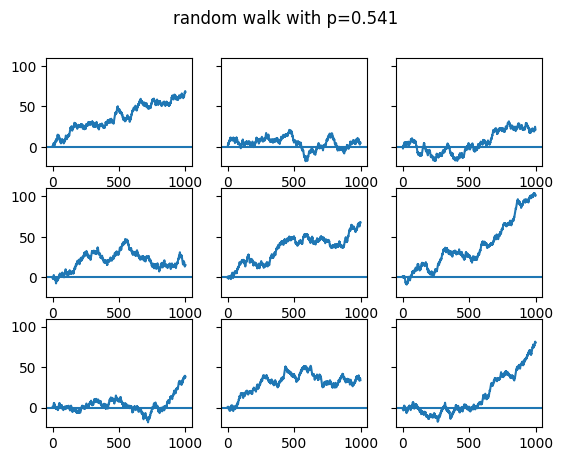

In [16]:
plot_random_walk(.541)

Most of them ended up +50 units after 1000 bets, which is pretty good. But a couple of them ended up being losers, even with the advantage.  The pick sellers I looked at don't sell picks for every single game. So with 1200 games in an NBA season, this could be several years' worth of results.

Finally, here is someone who is right 60% of the time. Success is pretty boring.

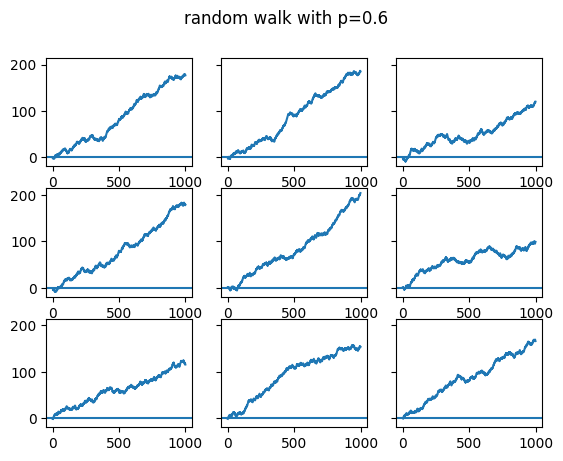

In [17]:
plot_random_walk(.6)

I've always said it's much harder to learn from success than from failure. At a 60% win rate, none of them really have long cold streaks, just small breaks between hot streaks.  

The graphs at 54.1% success rate appear a lot more human. They have hot and cold streaks, swoons, periods where they seem stuck in a range of values. Some of them scuffled the whole time, a couple finally figured it out near the end, a couple were consistently good. Even though they are randomly generated, they look like they have more to teach us, like they offer more opportunities to tell stories. 

Finally, here are some walks at 52.4% win rate, the break-even point. Most results end up close to zero after 1000 bets, but there is always a possibility of an extended run towards the positive or negative side.

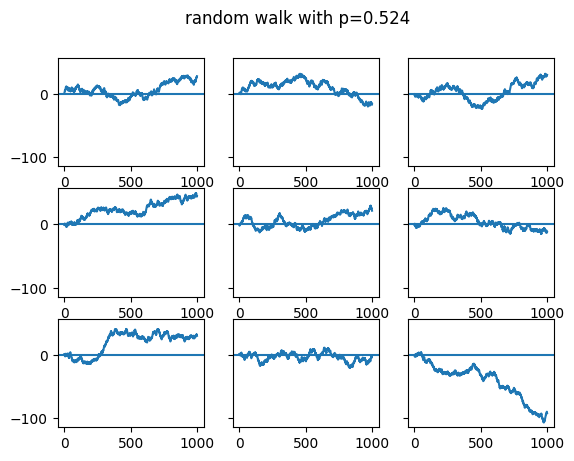

In [18]:
plot_random_walk(.524)

### The Axe Forgets, The Tree Remembers
If the 9 graphs were stock prices, which one would you consider the best investment? 

Well, we know they're equally bad investments. All have the same expected value moving forwards, which is zero, because they're winning just enough to pay the vig, but not make profits.

The previous results are meaningless and have no bearing on whether the next step will be up or down. Every step is essentially a new random walk. The coin doesn't remember what has happened in the past. We do.

This is what's known in math as a Martingale, named after a "betting system" that was popular in France hundreds of years ago. The basic idea behind all these betting systems is to "chase" losses by betting more when you're losing.

Hopefully it's obvious that these chase systems are crazy, though formally proving it led to a lot of interesting math. 


### The Gambler's Ruin

If each bet you make has a negative expected value, you can't fix that by betting MORE. People do these chase systems on paper and end up taking million dollar bets to try to get out of a million dollar hole. "If I keep doubling down, eventually I'll win it all back." Maybe if you have infinite capital and unlimited time. Otherwise the [Gambler's Ruin](https://en.wikipedia.org/wiki/Gambler%27s_ruin) is certain. The market can stay liquid longer than you can stay irrational.

There are many paradoxical things that happen on random walks, a lot of bad neighborhoods you might find yourself in. The longer you random walk, the higher the chances you end up in a bad part of town.

So maybe the fact that your chances of ruin go up the longer you Kelly bet should not be all that surprising.

Next up: Touts, and what they're touting.